## Darcy's flow: Two-step Method

In [1]:
import sys
#sys.path.append('/Users/josorior/Documents/UW/research/keql/KEQL/source')
sys.path.append('/Users/yasaminjalalian/Repos/KEQL/source')

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error
from parameter_learning import *
from plotlib import *
from models import *

1. This u will be drawn from a GP and in order to generate a test set we again draw from the same GP with another bandwidth and scaled to represent a small perturbation. 
2. We still have the access to the derivatives. Check how derivatives are computed. 
3. Draw from a GP and add those value to the sine. 

In [3]:
N = 100
m = 3
np.random.seed(2023)

minrange = [0,0]
maxrange = [1,1]
x_train = np.random.uniform(low = minrange, high = maxrange, size = (N,2))
x_test = np.random.uniform(low = minrange, high = maxrange, size = (1000,2))

u_train, u_x_train, u_y_train, u_xx_train, u_yy_train, a_train, a_x_train, a_y_train = darcy_solutions(x_train,k=2,d=3,c=4)
u_test,  u_x_test,  u_y_test, u_xx_test, u_yy_test, a_test, a_x_test, a_y_test = darcy_solutions(x_test, k=2,d=3,c=4)

### Solution: Two-Step Method

> Step 1: Learning $u's$

In [4]:
optim_sgm, alphas, optim_lmbd = kernel_parameters(x_train,u_train)

In [5]:
optim_sgm, optim_lmbd

(array([0.32427926, 0.64807259, 0.86393481]),
 array([4.83293024e-07, 2.06913808e-06, 2.06913808e-06]))

In [6]:
u_pred_train, u_x_pred_train, u_y_pred_train, u_xx_pred_train, u_yy_pred_train = predictions_darcy(x_train, x_train, Gaussian2D, optim_sgm, alphas)
u_pred_test, u_x_pred_test, u_y_pred_test, u_xx_pred_test, u_yy_pred_test = predictions_darcy(x_test, x_train, Gaussian2D, optim_sgm, alphas)

mse u_1 =  2.6068264595704567e-05
mse u_2 =  3.052477618787044e-05
mse u_3 =  3.480579798990435e-07


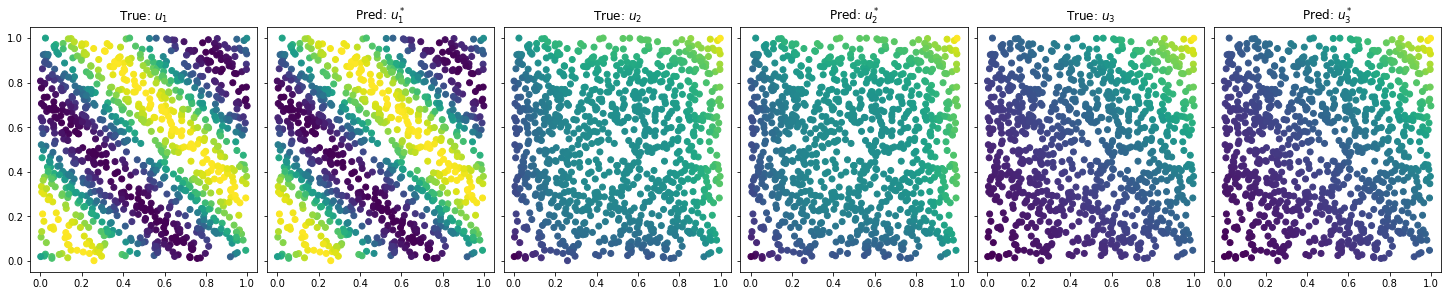

In [7]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows = 1, ncols=6 ,sharey= True, figsize = (20,4),constrained_layout=True)
true1 = u_test[:,0]
pred1 = u_pred_test[:,0]
true2 = u_test[:,1]
pred2 = u_pred_test[:,1]
true3 = u_test[:,2]
pred3 = u_pred_test[:,2]
mse1 = mean_squared_error(true1,pred1)/mean_squared_error(0*true1,true1)
print('mse u_1 = ', mse1)
mse2 = mean_squared_error(true2,pred2)/mean_squared_error(0*true2,true2)
print('mse u_2 = ', mse2)
mse3 = mean_squared_error(true3,pred3)/mean_squared_error(0*true3,true3)
print('mse u_3 = ', mse3)
ax1.set_title('True: $u_1$')
ax1.scatter(x_test[:,0],x_test[:,1],c = true1)
ax2.set_title('Pred: $u^*_1$')
ax2.scatter(x_test[:,0],x_test[:,1],c = pred1)
ax3.set_title('True: $u_2$')
ax3.scatter(x_test[:,0],x_test[:,1],c = true2)
ax4.set_title('Pred: $u^*_2$')
ax4.scatter(x_test[:,0],x_test[:,1],c = pred2)
ax5.set_title('True: $u_3$')
ax5.scatter(x_test[:,0],x_test[:,1],c = true3)
ax6.set_title('Pred: $u^*_3$')
ax6.scatter(x_test[:,0],x_test[:,1],c = pred3)
#plt.savefig('u_comparison.png', dpi = 200)
plt.show()

mse u_1_x =  0.00027508438356535036
mse u_2_x =  0.0004149967821630035
mse u_3_x =  8.162980562785168e-05


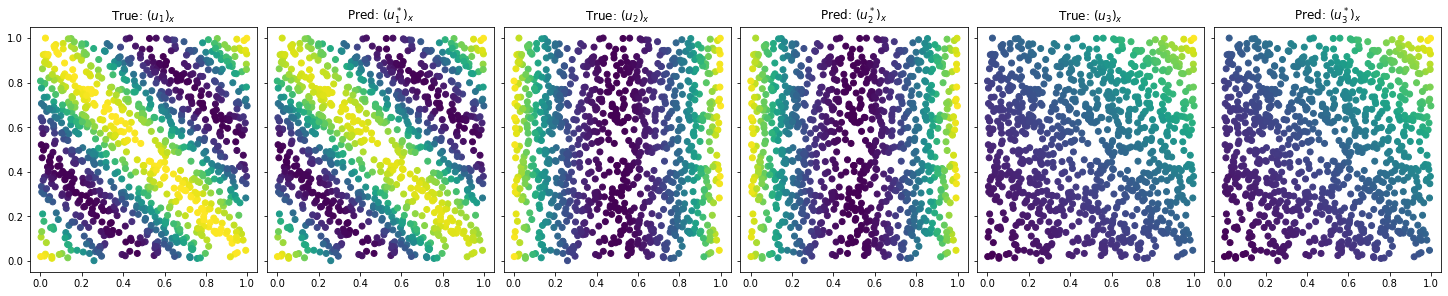

In [8]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows = 1, ncols=6 ,sharey= True, figsize = (20,4),constrained_layout=True)
true1 = u_x_test[:,0]
pred1 = u_x_pred_test[:,0]
true2 = u_x_test[:,1]
pred2 = u_x_pred_test[:,1]
true3 = u_x_test[:,2]
pred3 = u_x_pred_test[:,2]
mse1 = mean_squared_error(true1,pred1)/mean_squared_error(0*true1,true1)
print('mse u_1_x = ', mse1)
mse2 = mean_squared_error(true2,pred2)/mean_squared_error(0*true2,true2)
print('mse u_2_x = ', mse2)
mse3 = mean_squared_error(true3,pred3)/mean_squared_error(0*true3,true3)
print('mse u_3_x = ', mse3)
ax1.set_title('True: $(u_1)_{x}$')
ax1.scatter(x_test[:,0],x_test[:,1],c = true1)
ax2.set_title('Pred: $(u^*_1)_{x}$')
ax2.scatter(x_test[:,0],x_test[:,1],c = pred1)
ax3.set_title('True: $(u_2)_{x}$')
ax3.scatter(x_test[:,0],x_test[:,1],c = true2)
ax4.set_title('Pred: $(u^*_2)_{x}$')
ax4.scatter(x_test[:,0],x_test[:,1],c = pred2)
ax5.set_title('True: $(u_3)_{x}$')
ax5.scatter(x_test[:,0],x_test[:,1],c = true3)
ax6.set_title('Pred: $(u^*_3)_{x}$')
ax6.scatter(x_test[:,0],x_test[:,1],c = pred3)
#plt.savefig('u_x_comparison.png', dpi = 200)
plt.show()

mse u_1_y =  6.430178529313413e-05
mse u_2_y =  0.000474341165086908
mse u_3_y =  8.456752148030594e-05


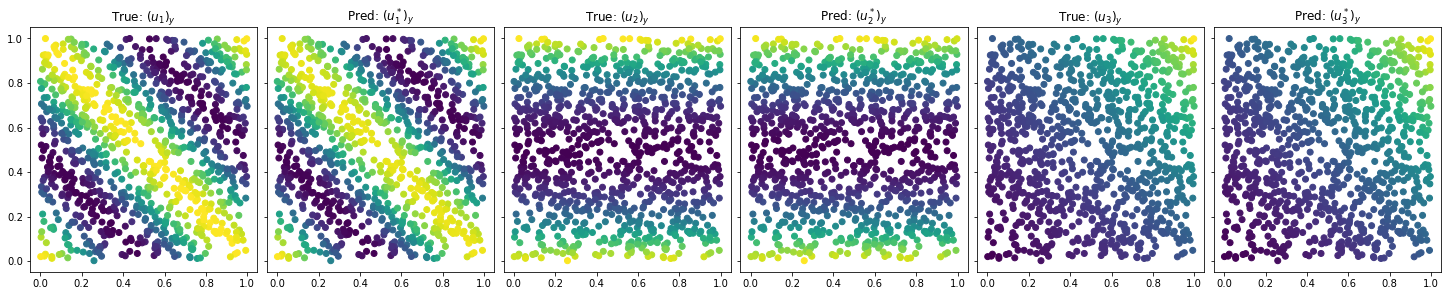

In [9]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows = 1, ncols=6 ,sharey= True, figsize = (20,4),constrained_layout=True)
true1 = u_y_test[:,0]
pred1 = u_y_pred_test[:,0]
true2 = u_y_test[:,1]
pred2 = u_y_pred_test[:,1]
true3 = u_y_test[:,2]
pred3 = u_y_pred_test[:,2]
mse1 = mean_squared_error(true1,pred1)/mean_squared_error(0*true1,true1)
print('mse u_1_y = ', mse1)
mse2 = mean_squared_error(true2,pred2)/mean_squared_error(0*true2,true2)
print('mse u_2_y = ', mse2)
mse3 = mean_squared_error(true3,pred3)/mean_squared_error(0*true3,true3)
print('mse u_3_y = ', mse3)
ax1.set_title('True: $(u_1)_{y}$')
ax1.scatter(x_test[:,0],x_test[:,1],c = true1)
ax2.set_title('Pred: $(u^*_1)_{y}$')
ax2.scatter(x_test[:,0],x_test[:,1],c = pred1)
ax3.set_title('True: $(u_2)_{y}$')
ax3.scatter(x_test[:,0],x_test[:,1],c = true2)
ax4.set_title('Pred: $(u^*_2)_{y}$')
ax4.scatter(x_test[:,0],x_test[:,1],c = pred2)
ax5.set_title('True: $(u_3)_{y}$')
ax5.scatter(x_test[:,0],x_test[:,1],c = true3)
ax6.set_title('Pred: $(u^*_3)_{y}$')
ax6.scatter(x_test[:,0],x_test[:,1],c = pred3)
#plt.savefig('u_y_comparison.png', dpi = 200)
plt.show()

mse u_1_xx =  0.001499580434936087
mse u_2_xx =  0.004899046153013066
mse u_3_xx =  0.014703807272700625


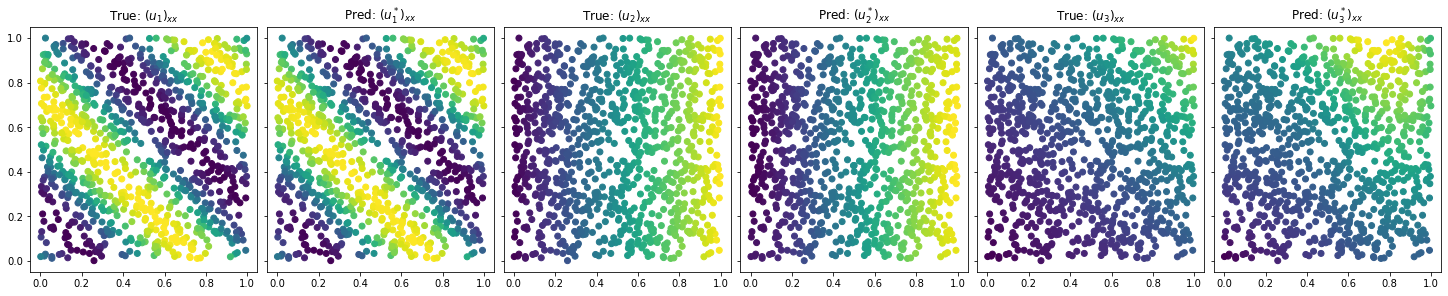

In [10]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows = 1, ncols=6 ,sharey= True, figsize = (20,4),constrained_layout=True)
true1 = u_xx_test[:,0]
pred1 = u_xx_pred_test[:,0]
true2 = u_xx_test[:,1]
pred2 = u_xx_pred_test[:,1]
true3 = u_xx_test[:,2]
pred3 = u_xx_pred_test[:,2]
mse1 = mean_squared_error(true1,pred1)/mean_squared_error(0*true1,true1)
print('mse u_1_xx = ', mse1)
mse2 = mean_squared_error(true2,pred2)/mean_squared_error(0*true2,true2)
print('mse u_2_xx = ', mse2)
mse3 = mean_squared_error(true3,pred3)/mean_squared_error(0*true3,true3)
print('mse u_3_xx = ', mse3)
ax1.set_title('True: $(u_1)_{xx}$')
ax1.scatter(x_test[:,0],x_test[:,1],c = true1)
ax2.set_title('Pred: $(u^*_1)_{xx}$')
ax2.scatter(x_test[:,0],x_test[:,1],c = pred1)
ax3.set_title('True: $(u_2)_{xx}$')
ax3.scatter(x_test[:,0],x_test[:,1],c = true2)
ax4.set_title('Pred: $(u^*_2)_{xx}$')
ax4.scatter(x_test[:,0],x_test[:,1],c = pred2)
ax5.set_title('True: $(u_3)_{xx}$')
ax5.scatter(x_test[:,0],x_test[:,1],c = true3)
ax6.set_title('Pred: $(u^*_3)_{xx}$')
ax6.scatter(x_test[:,0],x_test[:,1],c = pred3)
#plt.savefig('u_xx_comparison.png', dpi = 200)
plt.show()

In [11]:
# Save true gradients for comparing later
np.save('data/u_x_train.npy',u_x_train)
np.save('data/u_y_train.npy',u_y_train)
np.save('data/u_xx_train.npy',u_xx_train)
np.save('data/u_yy_train.npy',u_yy_train)
# Save gradients for one step method
np.save('data/u_x_pred_train.npy',u_x_pred_train)
np.save('data/u_y_pred_train.npy',u_y_pred_train)
np.save('data/u_xx_pred_train.npy',u_xx_pred_train)
np.save('data/u_yy_pred_train.npy',u_yy_pred_train)

> Step 2: Learning $P$

In [12]:
x_train_all = np.tile(x_train,(m,1)) # 300 * 2

f_train = np.zeros((N,m))
for i in range(m):
    f_train[:,i] = np.multiply(a_x_train,u_x_train[:,i]) + np.multiply(a_train,u_xx_train[:,i]) + np.multiply(a_y_train,u_y_train[:,i]) + np.multiply(a_train,u_yy_train[:,i])
f_train = f_train.T.flatten().reshape(-1,1)  # 300 * 1 

s_train = np.hstack((x_train_all,u_pred_train.T.reshape(m*N,1),u_x_pred_train.T.reshape(m*N,1),u_y_pred_train.T.reshape(m*N,1), u_xx_pred_train.T.reshape(m*N,1),u_yy_pred_train.T.reshape(m*N,1)))  # 300 * 7

scaler_s_train = MinMaxScaler()
s_train_s = scaler_s_train.fit_transform(s_train)

In [13]:
optim_sgm_P, optim_lmbd_P = grid_search_RBF(s_train_s,f_train)
krr_optimal_P = KernelRidge(kernel='rbf', alpha = optim_lmbd_P, gamma=1/(2*(optim_sgm_P**2))) 
krr_optimal_P.fit(s_train_s, f_train) 
f_pred_train = krr_optimal_P.predict(s_train_s) 

In [14]:
optim_lmbd_P

3.792690190732246e-05

Normalized MSE for P =  1.4702068876170431e-07


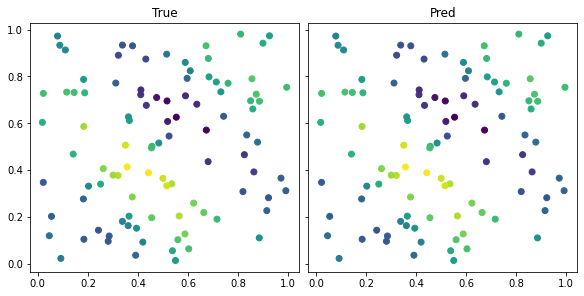

In [15]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols=2 ,sharey= True, figsize = (8,4),constrained_layout=True)
true = f_train[:N]
pred = f_pred_train[:N]
mse = mean_squared_error(true,pred)/mean_squared_error(0*true,true)
print('Normalized MSE for P = ',mse)
ax1.set_title('True')
ax1.scatter(x_train[:,0],x_train[:,1],c = true)
ax2.set_title('Pred')
ax2.scatter(x_train[:,0],x_train[:,1],c = pred)
#plt.savefig('P_comparison_darcy.png', dpi = 200)
plt.show()

### Evaluation of the model

We create three scenarios.  

1. We add noise to the training data.
2. We add noise in relation to the sd of data.
3. We add noise in relation to the sd of each variable in the data.

>Test 1: Add arbitrary noise to observations.

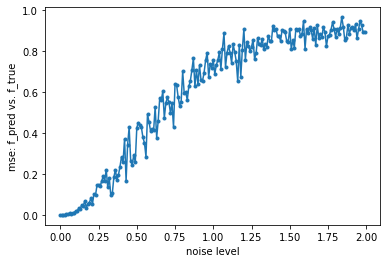

In [16]:
scales = np.arange(0.0,2,0.01)   
mses_P = [] 
for scale in scales:
    # Perturb
    s_test = np.random.normal(s_train,scale=scale)
    # Scale
    s_test_s = scaler_s_train.transform(s_test)
    s_test = scaler_s_train.inverse_transform(s_test_s)
    # Compute predictions on test
    f_pred_test = krr_optimal_P.predict(s_test_s)
    # compute a's on s_test_s
    a_test = a(s_test[:,0],s_test[:,1],k=1)
    a_x_test = u_dot(a,s_test[:,:2],2,0)
    a_y_test = u_dot(a,s_test[:,:2],2,1)
    # True test -> Why if I use this rule for s_test_s the bellow rule cannot be compared with f_pred_test
    f_true_test = np.multiply(a_x_test,s_test[:,3]) + np.multiply(a_test,s_test[:,5]) + np.multiply(a_y_test, s_test[:,4]) + np.multiply(a_test, s_test[:,6])
    # Compute mse per scale 
    mses_P.append(mean_squared_error(f_true_test,f_pred_test)/mean_squared_error(0*f_true_test,f_true_test))
# Plot 
plt.plot(scales,mses_P,'.-')
plt.xlabel('noise level')
plt.ylabel('mse: f_pred vs. f_true')
plt.show()

> Test 2: Compute global std $\sigma_{\text{global}}$ of `s_train_s` and perturb directly `s_train_s` using $m \sigma_{\text{global}}$ each element. $m \in (0.00,0.25)$.

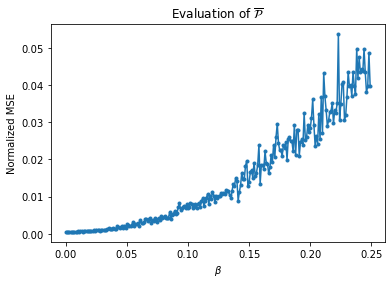

In [17]:
# Compute global std of s_train_s
global_std = np.std(s_train_s)
beta = np.arange(0.0,0.25,0.001)
scales = beta*global_std  
   
mses_P = [] 
for scale in scales:
    # Perturb scaled training data 
    s_test_s = np.random.normal(s_train_s,scale=scale)
    # Compute predictions on test
    f_pred_test = krr_optimal_P.predict(s_test_s)
    # True test -> Why if I use this rule for s_test_s the bellow rule cannot be compared with f_pred_test
    s_test = scaler_s_train.inverse_transform(s_test_s)
    # compute a's on s_test_s
    a_test = a(s_test[:,0],s_test[:,1],k=1)
    a_x_test = u_dot(a,s_test[:,:2],2,0)
    a_y_test = u_dot(a,s_test[:,:2],2,1)
    # True test -> Why if I use this rule for s_test_s the bellow rule cannot be compared with f_pred_test
    f_true_test = np.multiply(a_x_test,s_test[:,3]) + np.multiply(a_test,s_test[:,5]) + np.multiply(a_y_test, s_test[:,4]) + np.multiply(a_test, s_test[:,6])
    # Compute mse per scale 
    mses_P.append(mean_squared_error(f_true_test,f_pred_test)/mean_squared_error(0*f_true_test,f_true_test))
# Plot 
plt.plot(beta,mses_P,'.-')
plt.title('Evaluation of $\overline{\mathcal{P}}$')
plt.xlabel(r'$\beta$')
plt.ylabel('Normalized MSE')
#plt.savefig('P_eval_darcy.png', dpi = 200)
plt.show()

> Test 3: Compute std per feature i $\sigma_{\text{s[:,i]}}$ of `s_train_s` and perturb feature i of `s_train_s` using $m \sigma_{\text{s[:,i]}}$ each element. $m \in (0.01,0.25)$.

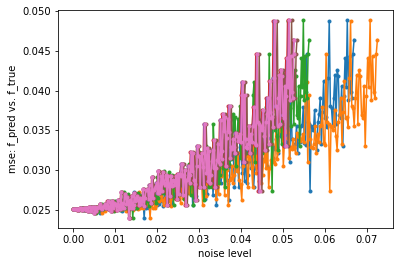

In [18]:
# Compute std per feature of s_train_s
stds = np.std(s_train_s, axis = 0)

scales = np.outer(np.arange(0.0,0.25,0.001),stds)
mses_P = [] 
for i in range(len(scales)):
    # Scales for current iteration
    scale = scales[i,:]
    # Perturb each feature
    for j in range(4):
        s_test_s[:,j] = np.random.normal(s_train_s[:,j] , scale = scale[j])
    # Compute predictions on test
    f_pred_test = krr_optimal_P.predict(s_test_s)
    s_test = scaler_s_train.inverse_transform(s_test_s)
    # compute a's on s_test_s
    a_test = a(s_test[:,0],s_test[:,1],k=1)
    a_x_test = u_dot(a,s_test[:,:2],2,0)
    a_y_test = u_dot(a,s_test[:,:2],2,1)
    # True test -> Why if I use this rule for s_test_s the bellow rule cannot be compared with f_pred_test
    f_true_test = np.multiply(a_x_test,s_test[:,3]) + np.multiply(a_test,s_test[:,5]) + np.multiply(a_y_test, s_test[:,4]) + np.multiply(a_test, s_test[:,6])
    # Compute mse per scale 
    mses_P.append(mean_squared_error(f_true_test,f_pred_test)/mean_squared_error(0*f_true_test,f_true_test))
# Plot - We have a vector of dimension 4 of scales vs. mses
plt.plot(scales,mses_P,'.-')
plt.xlabel('noise level')
plt.ylabel('mse: f_pred vs. f_true')
plt.show()